In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
books = pd.read_csv("D:/DataScience/regression/book.csv", encoding='latin-1')

In [3]:
books.head(20)

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
5,6,276744,The Kitchen God's Wife,7
6,7,276745,What If?: The World's Foremost Military Histor...,10
7,8,276747,PLEADING GUILTY,9
8,9,276747,Under the Black Flag: The Romance and the Real...,9
9,10,276747,Where You'll Find Me: And Other Stories,8


In [4]:
print(books.shape)
print(list(books.columns))

(10000, 4)
['Unnamed: 0', 'User.ID', 'Book.Title', 'Book.Rating']


In [5]:
ratings = pd.DataFrame(books.groupby('User.ID')['Book.Rating'].mean())
ratings.head(5)

,Book.Rating
User.ID,
8,5.571429
9,6.000000
10,6.000000
12,10.000000
14,5.333333


In [6]:
ratings['number_of_ratings'] = books.groupby('User.ID')['Book.Rating'].count()
ratings.head()

,Book.Rating,number_of_ratings
User.ID,,
8,5.571429,7
9,6.000000,1
10,6.000000,1
12,10.000000,1
14,5.333333,3


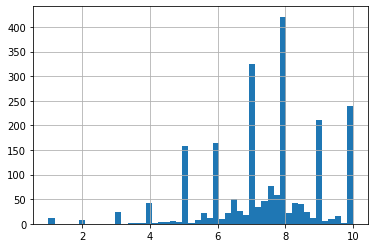

In [7]:
ratings['Book.Rating'].hist(bins=50)

In [8]:
ratings.sort_values('number_of_ratings', ascending=False).head(10)

,Book.Rating,number_of_ratings
User.ID,,
3757,6.996176,523
162052,8.280374,214
2276,8.349057,212
4017,8.967949,156
277427,8.453333,150
2033,8.704545,132
278418,6.170940,117
2110,8.281553,103
3363,8.978723,94


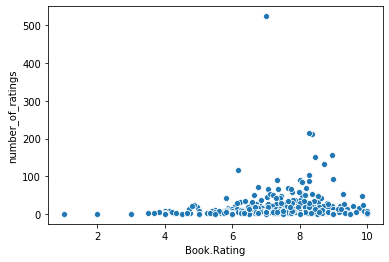

In [9]:
import seaborn as sns
sns.scatterplot(x='Book.Rating', y='number_of_ratings', data=ratings)

In [10]:
#Jane Doe

books_matrix = books.pivot_table(index='User.ID', columns='Book.Title', values='Book.Rating')
books_matrix.head()

Book.Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
User.ID,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
ratings.sort_values('number_of_ratings', ascending=False).head(10)

,Book.Rating,number_of_ratings
User.ID,,
3757,6.996176,523
162052,8.280374,214
2276,8.349057,212
4017,8.967949,156
277427,8.453333,150
2033,8.704545,132
278418,6.170940,117
2110,8.281553,103
3363,8.978723,94


In [22]:
JD_user_rating = books_matrix['Jane Doe']

In [23]:
JD_user_rating

User.ID
8        NaN
9        NaN
10       NaN
12       NaN
14       NaN
          ..
278846   NaN
278849   NaN
278851   NaN
278852   NaN
278854   NaN
Name: Jane Doe, Length: 2182, dtype: float64

In [13]:
JD_user_rating.head()

User.ID
8    NaN
9    NaN
10   NaN
12   NaN
14   NaN
Name: Jane Doe, dtype: float64

In [24]:
Beloved_user_rating = books_matrix['Beloved (Plume Contemporary Fiction)']

In [26]:
Beloved_user_rating

User.ID
8        NaN
9        NaN
10       NaN
12       NaN
14       NaN
          ..
278846   NaN
278849   NaN
278851   NaN
278852   NaN
278854   NaN
Name: Beloved (Plume Contemporary Fiction), Length: 2182, dtype: float64

In [25]:
Beloved_user_rating.head()

User.ID
8    NaN
9    NaN
10   NaN
12   NaN
14   NaN
Name: Beloved (Plume Contemporary Fiction), dtype: float64

In [15]:
similar_to_Jane_Doe = books_matrix.corrwith(JD_user_rating)

C:\Users\agnis\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\agnis\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [16]:
similar_to_Jane_Doe.tail()

Book.Title
\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character   NaN
\Well, there's your problem\: Cartoons                                    NaN
iI Paradiso Degli Orchi                                                   NaN
stardust                                                                  NaN
Ã?Â?bermorgen.                                                            NaN
dtype: float64

In [17]:
similar_to_Beloved = books_matrix.corrwith(Beloved_user_rating)

In [18]:
similar_to_Beloved.head()

Book.Title
 Jason, Madison &amp                                                    NaN
 Other Stories;Merril;1985;McClelland &amp                              NaN
 Repairing PC Drives &amp                                               NaN
'48                                                                     NaN
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities   NaN
dtype: float64

In [19]:
corr_Beloved = pd.DataFrame(similar_to_Beloved, columns=['Correlation'])
corr_Beloved.dropna(inplace=True)
corr_Beloved.head(20)

,Correlation
Book.Title,


In [20]:
corr_JD = pd.DataFrame(similar_to_Jane_Doe, columns=['Correlation'])
corr_JD.dropna(inplace=True)
corr_JD.head(20)

,Correlation
Book.Title,
